In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./EURUSD Stochastic Strategy.csv")
data

Time     Open     High      Low    Close  \
0     2014.03.28 00:00:00  1.37438  1.37729  1.37047  1.37513   
1     2014.03.30 00:00:00  1.37531  1.37542  1.37448  1.37529   
2     2014.03.31 00:00:00  1.37525  1.38085  1.37215  1.37736   
3     2014.04.01 00:00:00  1.37736  1.38152  1.37690  1.37932   
4     2014.04.02 00:00:00  1.37930  1.38201  1.37530  1.37663   
...                   ...      ...      ...      ...      ...   
3644  2025.12.07 00:00:00  1.16360  1.16459  1.16360  1.16404   
3645  2025.12.08 00:00:00  1.16404  1.16720  1.16163  1.16406   
3646  2025.12.09 00:00:00  1.16406  1.16572  1.16150  1.16278   
3647  2025.12.10 00:00:00  1.16278  1.17027  1.16216  1.17014   
3648  2025.12.11 00:00:00  1.17014  1.17627  1.16822  1.17408   

      Stochastic Main  Stochastic Signal  Stoch Main - Signal  Stoch M-S Mid  \
0           22.691530          28.832887            -6.141357      25.762209   
1           23.920122          26.376505            -2.456383      25.148313   
2           38.034387          32.205446             5.828941      35.119916   
3           55.582590          43.894018            11.688572      49.738304   
4           63.848397          53.871207             9.977189      58.859802   
...               ...                ...                  ...            ...   
3644        56.236403          64.760351            -8.523947      60.498377   
3645        50.421856          57.591103            -7.169247      54.006480   
3646        38.692342          48.141723            -9.449381      43.417032   
3647        56.085377          52.113550             3.971827      54.099463   
3648        74.429375          63.271462            11.157912      68.850419   

      Stoch - 80  Stoch - 20   Stoch O    Stoch H    Stoch L  Stoch O-C  \
0     -57.308470    2.691530  22.69153  22.691530  22.691530   0.000000   
1     -56.079878    3.920122  22.69153  23.920122  22.691530  -1.228592   
2     -41.965613   18.034387  22.69153  38.034387  22.691530 -15.342857   
3     -24.417410   35.582590  22.69153  55.582590  22.691530 -32.891060   
4     -16.151603   43.848397  22.69153  63.848397  22.691530 -41.156867   
...          ...         ...       ...        ...        ...        ...   
3644  -23.763597   36.236403  22.69153  98.551023   1.372058 -33.544873   
3645  -29.578144   30.421856  22.69153  98.551023   1.372058 -27.730326   
3646  -41.307658   18.692342  22.69153  98.551023   1.372058 -16.000812   
3647  -23.914623   36.085377  22.69153  98.551023   1.372058 -33.393847   
3648   -5.570625   54.429375  22.69153  98.551023   1.372058 -51.737845   

      Stoch H-C  Stoch L-C  
0      0.000000   0.000000  
1      0.000000  -1.228592  
2      0.000000 -15.342857  
3      0.000000 -32.891060  
4      0.000000 -41.156867  
...         ...        ...  
3644  42.314619 -54.864345  
3645  48.129166 -49.049798  
3646  59.858680 -37.320284  
3647  42.465646 -54.713319  
3648  24.121648 -73.057317  

[3649 rows x 17 columns]

In [ ]:
train = data.iloc[:-(365 * 5),:]
test = data.iloc[-(365 * 5):,:]

In [ ]:
train

Time     Open     High      Low    Close  \
0     2014.03.28 00:00:00  1.37438  1.37729  1.37047  1.37513   
1     2014.03.30 00:00:00  1.37531  1.37542  1.37448  1.37529   
2     2014.03.31 00:00:00  1.37525  1.38085  1.37215  1.37736   
3     2014.04.01 00:00:00  1.37736  1.38152  1.37690  1.37932   
4     2014.04.02 00:00:00  1.37930  1.38201  1.37530  1.37663   
...                   ...      ...      ...      ...      ...   
1819  2020.01.30 00:00:00  1.10139  1.10394  1.10069  1.10287   
1820  2020.01.31 00:00:00  1.10286  1.10954  1.10170  1.10947   
1821  2020.02.02 00:00:00  1.10933  1.10933  1.10815  1.10892   
1822  2020.02.03 00:00:00  1.10893  1.10893  1.10359  1.10625   
1823  2020.02.04 00:00:00  1.10626  1.10643  1.10330  1.10447   

      Stochastic Main  Stochastic Signal  Stoch Main - Signal  Stoch M-S Mid  \
0           22.691530          28.832887            -6.141357      25.762209   
1           23.920122          26.376505            -2.456383      25.148313   
2           38.034387          32.205446             5.828941      35.119916   
3           55.582590          43.894018            11.688572      49.738304   
4           63.848397          53.871207             9.977189      58.859802   
...               ...                ...                  ...            ...   
1819        36.163660          26.074688            10.088972      31.119174   
1820        73.005016          49.539852            23.465164      61.272434   
1821        93.043478          71.291665            21.751813      82.167572   
1822        87.119741          79.205703             7.914038      83.162722   
1823        69.507640          74.356672            -4.849032      71.932156   

      Stoch - 80  Stoch - 20   Stoch O    Stoch H    Stoch L  Stoch O-C  \
0     -57.308470    2.691530  22.69153  22.691530  22.691530   0.000000   
1     -56.079878    3.920122  22.69153  23.920122  22.691530  -1.228592   
2     -41.965613   18.034387  22.69153  38.034387  22.691530 -15.342857   
3     -24.417410   35.582590  22.69153  55.582590  22.691530 -32.891060   
4     -16.151603   43.848397  22.69153  63.848397  22.691530 -41.156867   
...          ...         ...       ...        ...        ...        ...   
1819  -43.836340   16.163660  22.69153  98.551023   1.372058 -13.472130   
1820   -6.994984   53.005016  22.69153  98.551023   1.372058 -50.313486   
1821   13.043478   73.043478  22.69153  98.551023   1.372058 -70.351948   
1822    7.119741   67.119741  22.69153  98.551023   1.372058 -64.428211   
1823  -10.492360   49.507640  22.69153  98.551023   1.372058 -46.816110   

      Stoch H-C  Stoch L-C  
0      0.000000   0.000000  
1      0.000000  -1.228592  
2      0.000000 -15.342857  
3      0.000000 -32.891060  
4      0.000000 -41.156867  
...         ...        ...  
1819  62.387362 -34.791602  
1820  25.546007 -71.632958  
1821   5.507544 -91.671420  
1822  11.431281 -85.747683  
1823  29.043382 -68.135582  

[1824 rows x 17 columns]

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Stochastic Main'}>,
        <Axes: title={'center': 'Stochastic Signal'}>,
        <Axes: title={'center': 'Stoch Main - Signal'}>,
        <Axes: title={'center': 'Stoch M-S Mid'}>],
       [<Axes: title={'center': 'Stoch - 80'}>,
        <Axes: title={'center': 'Stoch - 20'}>,
        <Axes: title={'center': 'Stoch O'}>,
        <Axes: title={'center': 'Stoch H'}>],
       [<Axes: title={'center': 'Stoch L'}>,
        <Axes: title={'center': 'Stoch O-C'}>,
        <Axes: title={'center': 'Stoch H-C'}>,
        <Axes: title={'center': 'Stoch L-C'}>]], dtype=object)

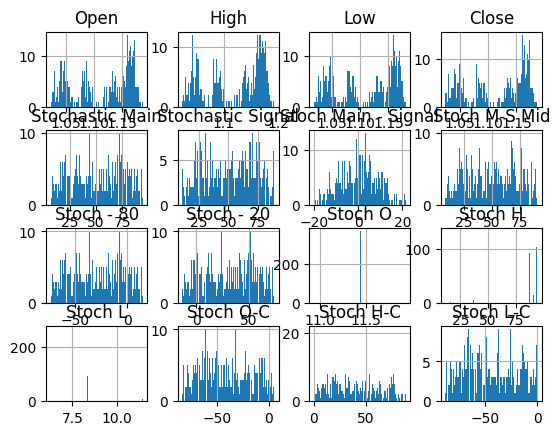

In [ ]:
data.iloc[:,1:].hist(bins=100)

In [ ]:
data.iloc[:,1:].corr()

Open      High       Low     Close  Stochastic Main  \
Open                 1.000000  0.997133  0.997829  0.995113         0.145451   
High                 0.997133  1.000000  0.996411  0.997902         0.157475   
Low                  0.997829  0.996411  1.000000  0.997668         0.152812   
Close                0.995113  0.997902  0.997668  1.000000         0.164795   
Stochastic Main      0.145451  0.157475  0.152812  0.164795         1.000000   
Stochastic Signal    0.175703  0.182341  0.176381  0.182281         0.934347   
Stoch Main - Signal -0.015234  0.002119  0.003378  0.022361         0.541033   
Stoch M-S Mid        0.162101  0.171794  0.166444  0.175769         0.985878   
Stoch - 80           0.145451  0.157475  0.152812  0.164795         1.000000   
Stoch - 20           0.145451  0.157475  0.152812  0.164795         1.000000   
Stoch O                   NaN       NaN       NaN       NaN              NaN   
Stoch H              0.287572  0.298170  0.283628  0.292967         0.273294   
Stoch L             -0.584436 -0.597474 -0.584631 -0.594986        -0.259108   
Stoch O-C           -0.145451 -0.157475 -0.152812 -0.164795        -1.000000   
Stoch H-C            0.020747  0.014909  0.011193  0.004673        -0.834181   
Stoch L-C           -0.170644 -0.183116 -0.177918 -0.190225        -0.998998   

                     Stochastic Signal  Stoch Main - Signal  Stoch M-S Mid  \
Open                          0.175703            -0.015234       0.162101   
High                          0.182341             0.002119       0.171794   
Low                           0.176381             0.003378       0.166444   
Close                         0.182281             0.022361       0.175769   
Stochastic Main               0.934347             0.541033       0.985878   
Stochastic Signal             1.000000             0.205809       0.980831   
Stoch Main - Signal           0.205809             1.000000       0.392555   
Stoch M-S Mid                 0.980831             0.392555       1.000000   
Stoch - 80                    0.934347             0.541033       0.985878   
Stoch - 20                    0.934347             0.541033       0.985878   
Stoch O                            NaN                  NaN            NaN   
Stoch H                       0.335457            -0.041185       0.307078   
Stoch L                      -0.301574             0.000179      -0.283399   
Stoch O-C                    -0.934347            -0.541033      -0.985878   
Stoch H-C                    -0.733488            -0.559703      -0.800819   
Stoch L-C                    -0.936167            -0.533986      -0.986185   

                     Stoch - 80  Stoch - 20  Stoch O   Stoch H   Stoch L  \
Open                   0.145451    0.145451      NaN  0.287572 -0.584436   
High                   0.157475    0.157475      NaN  0.298170 -0.597474   
Low                    0.152812    0.152812      NaN  0.283628 -0.584631   
Close                  0.164795    0.164795      NaN  0.292967 -0.594986   
Stochastic Main        1.000000    1.000000      NaN  0.273294 -0.259108   
Stochastic Signal      0.934347    0.934347      NaN  0.335457 -0.301574   
Stoch Main - Signal    0.541033    0.541033      NaN -0.041185  0.000179   
Stoch M-S Mid          0.985878    0.985878      NaN  0.307078 -0.283399   
Stoch - 80             1.000000    1.000000      NaN  0.273294 -0.259108   
Stoch - 20             1.000000    1.000000      NaN  0.273294 -0.259108   
Stoch O                     NaN         NaN      NaN       NaN       NaN   
Stoch H                0.273294    0.273294      NaN  1.000000 -0.733394   
Stoch L               -0.259108   -0.259108      NaN -0.733394  1.000000   
Stoch O-C             -1.000000   -1.000000      NaN -0.273294  0.259108   
Stoch H-C             -0.834181   -0.834181      NaN  0.302519 -0.163726   
Stoch L-C             -0.998998   -0.998998      NaN -0.303727  0.302081   

                     Stoch O-C  Stoch H-C  S

In [ ]:
data.iloc[:,1:].var()

Open                   2.673919e-03
High                   2.654317e-03
Low                    2.679380e-03
Close                  2.675806e-03
Stochastic Main        5.936164e+02
Stochastic Signal      4.384253e+02
Stoch Main - Signal    7.872141e+01
Stoch M-S Mid          4.963405e+02
Stoch - 80             5.936164e+02
Stoch - 20             5.936164e+02
Stoch O                1.139089e-28
Stoch H                1.987307e+02
Stoch L                1.308808e+00
Stoch O-C              5.936164e+02
Stoch H-C              6.046122e+02
Stoch L-C              6.093696e+02
dtype: float64

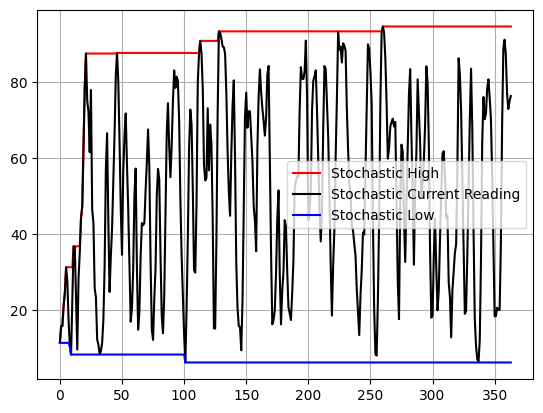

In [ ]:
plt.plot(data['Stoch H'],color='red')
plt.plot(data['Stochastic Main'],color='black')
plt.plot(data['Stoch L'],color='blue')
plt.grid()
plt.legend(['Stochastic High','Stochastic Current Reading','Stochastic Low'])

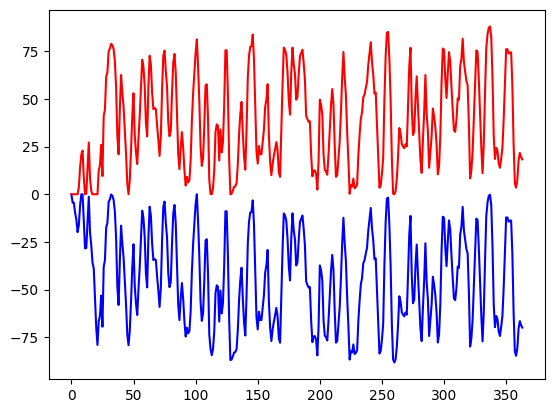

In [ ]:
plt.plot(data["Stoch L-C"],color="blue")
plt.plot(data["Stoch H-C"],color="red")

Text(0.5, 1.0, 'Open')

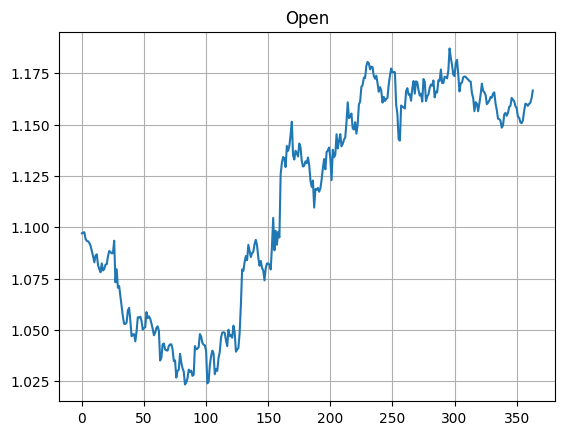

In [ ]:
index = 1
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'High')

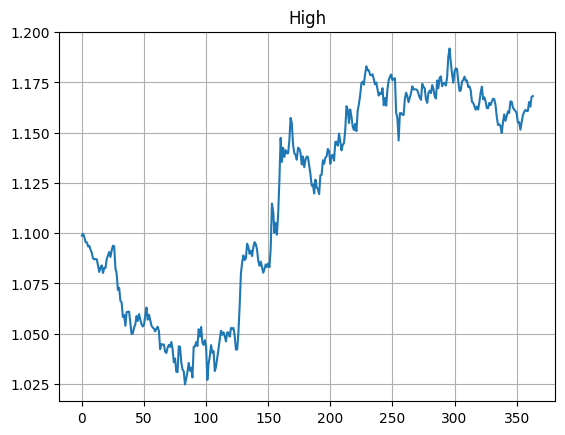

In [ ]:
index = 2
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Low')

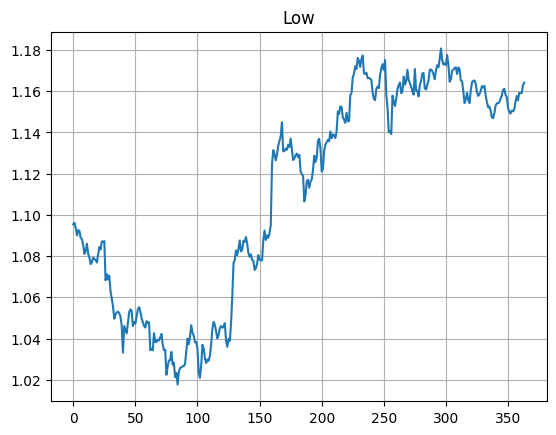

In [ ]:
index = 3
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Close')

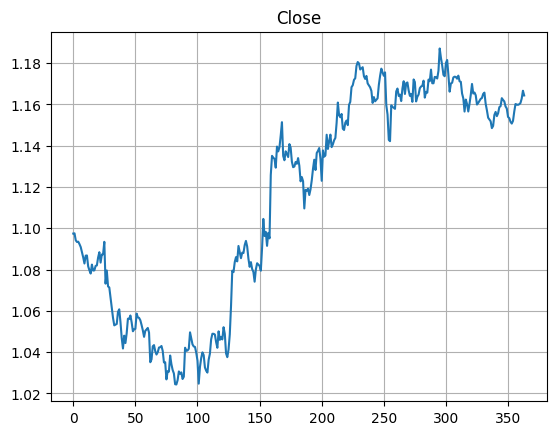

In [ ]:
index = 4
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Stochastic Main')

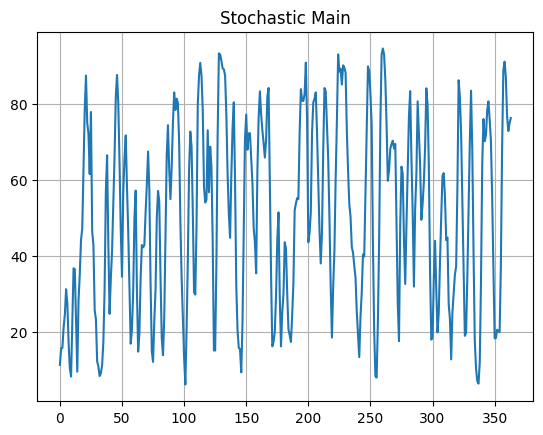

In [ ]:
index = 5
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Stochastic Signal')

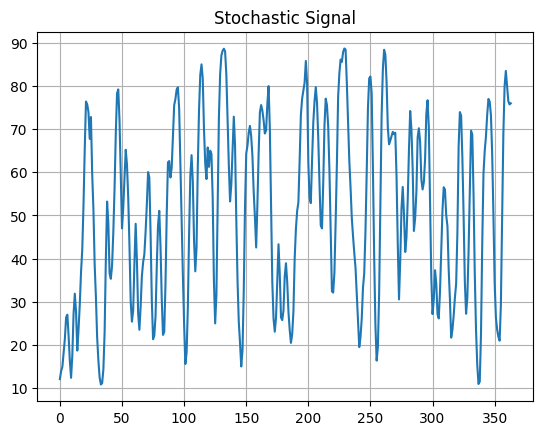

In [ ]:
index = 6
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Stoch Main - Signal')

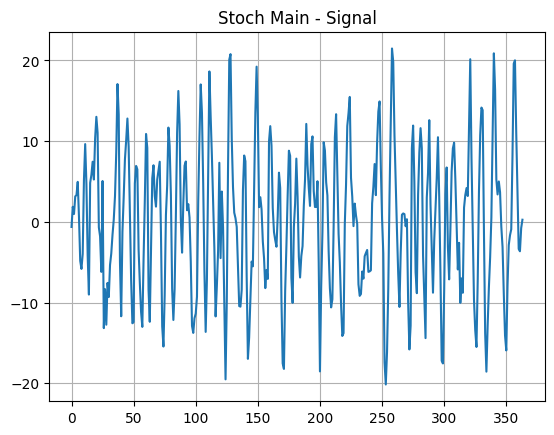

In [ ]:
index = 7
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Stoch M-S Mid')

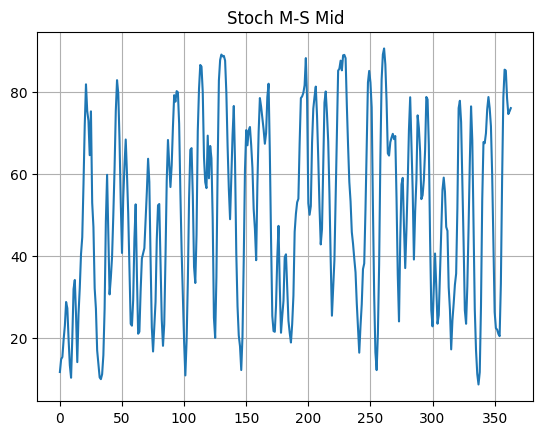

In [ ]:
index = 8
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

Text(0.5, 1.0, 'Stoch - 80')

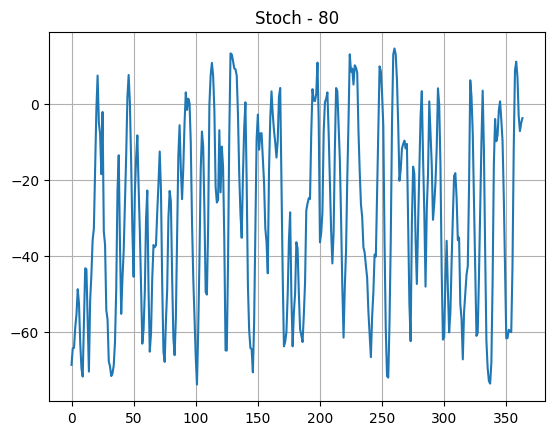

In [ ]:
index = 9
plt.grid()
plt.plot(data.iloc[:,index])
plt.title(data.iloc[:,[index]].columns[0])

In [ ]:
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import cross_val_score,TimeSeriesSplit

In [ ]:
HORIZON = 5

In [ ]:
tscv = TimeSeriesSplit(n_splits=10,gap=HORIZON)

In [ ]:
data['Target'] = data['Stochastic Main'].shift(-HORIZON)
data = data.iloc[:-HORIZON,:]
data

Time     Open     High      Low    Close  Stochastic Main  \
0    2024.10.07 00:00:00  1.09705  1.09868  1.09542  1.09743        11.430045   
1    2024.10.08 00:00:00  1.09743  1.09971  1.09609  1.09754        15.800763   
2    2024.10.09 00:00:00  1.09754  1.09787  1.09361  1.09415        15.889831   
3    2024.10.10 00:00:00  1.09415  1.09547  1.09001  1.09334        21.223386   
4    2024.10.11 00:00:00  1.09334  1.09537  1.09260  1.09349        24.705882   
..                   ...      ...      ...      ...      ...              ...   
354  2025.11.24 00:00:00  1.15071  1.15504  1.15019  1.15201        20.034642   
355  2025.11.25 00:00:00  1.15202  1.15860  1.15116  1.15646        37.311083   
356  2025.11.26 00:00:00  1.15646  1.16022  1.15470  1.16019        68.343480   
357  2025.11.27 00:00:00  1.16018  1.16134  1.15765  1.15995        88.787402   
358  2025.11.28 00:00:00  1.15995  1.16075  1.15550  1.15978        91.080515   

     Stochastic Signal  Stoch Main - Signal  Stoch M-S Mid  Stoch - 80  \
0            12.060839            -0.630795      11.745442  -68.569955   
1            13.930801             1.869962      14.865782  -64.199237   
2            14.910316             0.979515      15.400073  -64.110169   
3            18.066851             3.156535      19.645119  -58.776614   
4            21.386367             3.319516      23.046125  -55.294118   
..                 ...                  ...            ...         ...   
354          20.951270            -0.916628      20.492956  -59.965358   
355          29.131177             8.179906      33.221130  -42.688917   
356          48.737328            19.606151      58.540404  -11.656520   
357          68.762365            20.025037      78.774883    8.787402   
358          79.921440            11.159075      85.500977   11.080515   

     Stoch - 20    Stoch O    Stoch H    Stoch L  Stoch O-C  Stoch H-C  \
0     -8.569955  11.430045  11.430045  11.430045   0.000000   0.000000   
1     -4.199237  11.430045  15.800763  11.430045  -4.370718   0.000000   
2     -4.110169  11.430045  15.889831  11.430045  -4.459786   0.000000   
3      1.223386  11.430045  21.223386  11.430045  -9.793342   0.000000   
4      4.705882  11.430045  24.705882  11.430045 -13.275838   0.000000   
..          ...        ...        ...        ...        ...        ...   
354    0.034642  11.430045  94.552586   6.277552  -8.604597  74.517944   
355   17.311083  11.430045  94.552586   6.277552 -25.881038  57.241503   
356   48.343480  11.430045  94.552586   6.277552 -56.913435  26.209106   
357   68.787402  11.430045  94.552586   6.277552 -77.357357   5.765184   
358   71.080515  11.430045  94.552586   6.277552 -79.650470   3.472071   

     Stoch L-C     Target  
0     0.000000  31.305842  
1    -4.370718  27.617709  
2    -4.459786  17.312860  
3    -9.793342  10.492424  
4   -13.275838   8.361204  
..         ...        ...  
354 -13.757090  87.068966  
355 -31.033531  76.780671  
356 -62.065927  72.849639  
357 -82.509849  74.953903  
358 -84.802962  76.256000  

[359 rows x 18 columns]

In [ ]:
X_classic = data.iloc[:,1:7].columns
X_new     = data.iloc[:,7:-1].columns
X_all     = data.iloc[:,1:-1].columns
y         = 'Target'

In [ ]:
scores = []

In [ ]:
model = LinearRegression()

In [ ]:
scores.append(np.mean(np.abs(cross_val_score(model,data.loc[:,X_classic],data.loc[:,y],cv=tscv,scoring='neg_mean_squared_error'))))

In [ ]:
scores.append(np.mean(np.abs(cross_val_score(model,data.loc[:,X_new],data.loc[:,y],cv=tscv,scoring='neg_mean_squared_error'))))

In [ ]:
scores.append(np.mean(np.abs(cross_val_score(model,data.loc[:,X_all],data.loc[:,y],cv=tscv,scoring='neg_mean_squared_error'))))

In [ ]:
scores / np.min(scores)

array([1.40170226, 1.        , 3.29482382])

([<matplotlib.axis.XTick at 0x7c392e1d1b80>,
 [Text(0, 0, 'OHLC Features'),
  Text(1, 0, 'Custom Features'),
  Text(2, 0, 'All Features')])

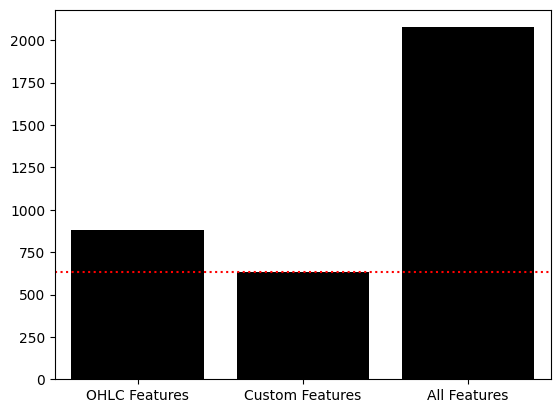

In [ ]:
sns.barplot(np.abs(scores),color='black')
plt.axhline(np.min(scores),linestyle=':',color='red')
plt.xticks([0,1,2],['OHLC Features','Custom Features','All Features'])

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),GradientBoostingRegressor(),LinearSVR()]

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

([<matplotlib.axis.XTick at 0x7c392e9e69c0>,
 [Text(0, 0, 'LinearRegression()'),
  Text(1, 0, 'Ridge()'),
  Text(2, 0, 'Lasso()'),
  Text(3, 0, 'RandomForestRegressor()'),
  Text(4, 0, 'GradientBoostingRegressor()'),
  Text(5, 0, 'LinearSVR()')])

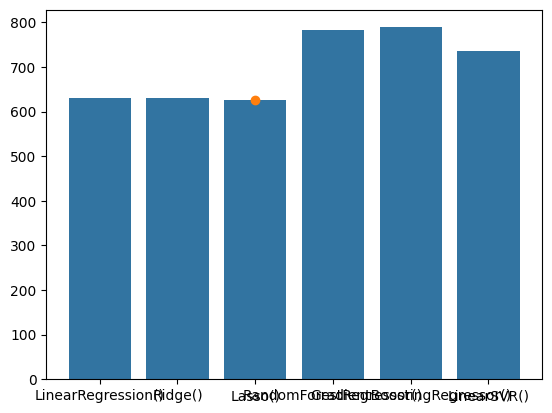

In [ ]:
scores = []

for i in np.arange(len(models)):
  model = models[i]
  scores.append(np.mean(np.abs(cross_val_score(model,data.loc[:,X_new],data.loc[:,y],cv=tscv,scoring='neg_mean_squared_error'))))

sns.barplot(scores)
plt.scatter(np.argmin(scores),np.min(scores))
plt.xticks(np.arange(len(models)),models)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
scores = mutual_info_regression(data.loc[:,X_new],data.loc[:,'Target'])

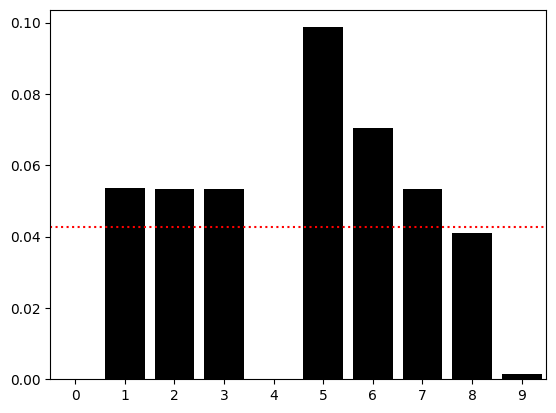

In [ ]:
sns.barplot(scores,color='black')
plt.axhline(np.mean(scores),color='red',linestyle=':')

In [ ]:
model = Lasso()

In [ ]:
model.fit(data.loc[:,X_new],data['Target'])

Lasso()

<Axes: >

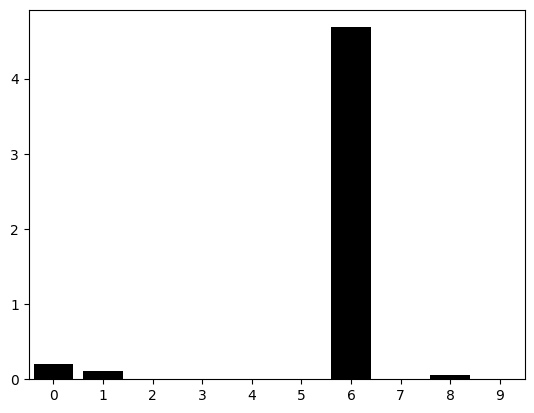

In [ ]:
sns.barplot(np.abs(model.coef_),color='black')

In [ ]:
!pip install onnx skl2onnx

  Using cached onnx-1.20.0-cp312-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 24.8 MB/s eta 0:00:00


In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
initial_types = [('float input',FloatTensorType([1,len(X_new)]))]

In [ ]:
model = GradientBoostingRegressor()

model.fit(train.loc[:,X_new],train.iloc[:,-1])

GradientBoostingRegressor()

In [ ]:
onnx_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [ ]:
onnx.save(onnx_proto,'EURUSD Stochastic GBR AI.onnx')

In [ ]:
len(X_new)

10